In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [22]:
df = pd.read_csv('loan_data.csv')

In [23]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


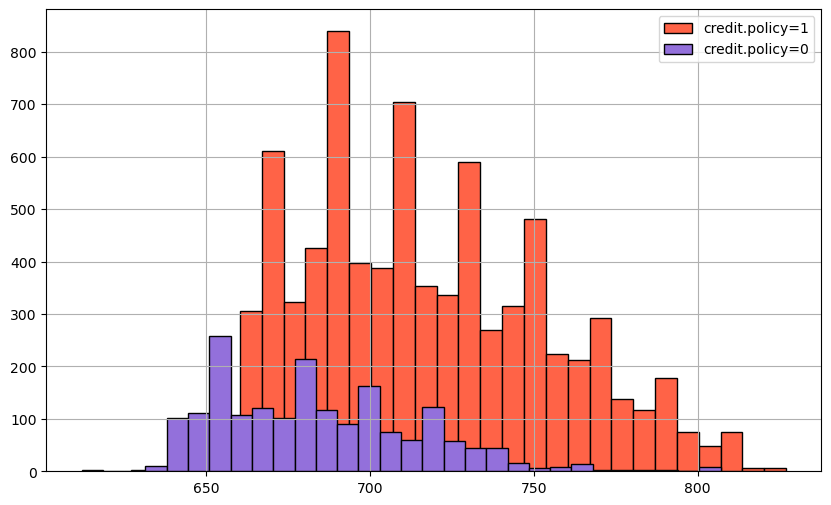

In [61]:
#EDA
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=30, label = 'credit.policy=1', color='tomato',edgecolor='black')
df[df['credit.policy']==0]['fico'].hist(bins=30, label = 'credit.policy=0',color='mediumpurple' ,edgecolor='black')
plt.legend()
plt.show()

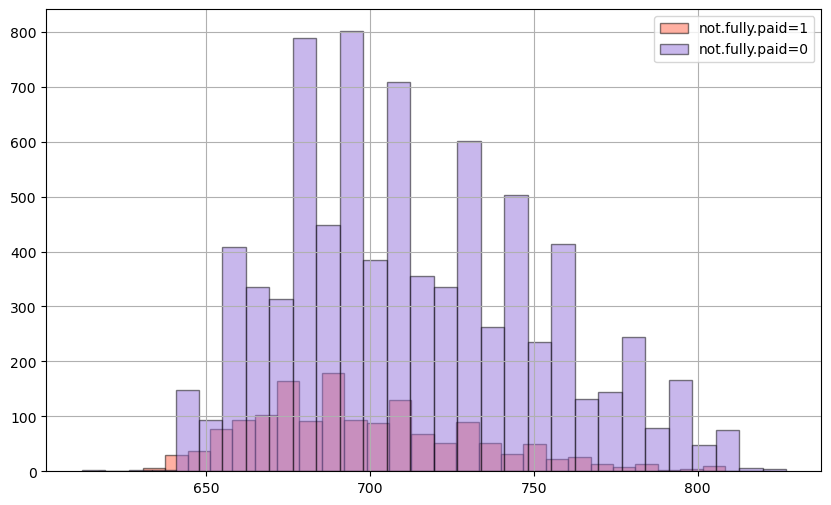

In [64]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30, label = 'not.fully.paid=1', color='tomato',edgecolor='black')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30, label = 'not.fully.paid=0',color='mediumpurple' ,edgecolor='black')
plt.legend()
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

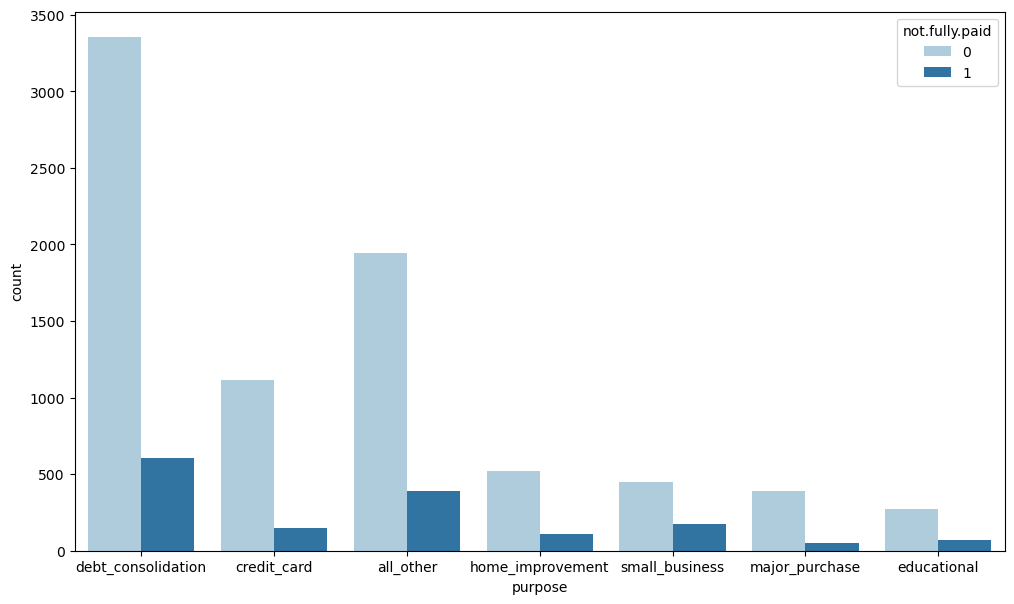

In [101]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose',hue='not.fully.paid', data = df, palette= "Paired")



In [115]:
#transforming categorical variable purpose to dummy

dummies = ['purpose']



In [117]:
final_data = pd.get_dummies(df,columns=dummies,drop_first=True)

In [119]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [121]:
from sklearn.model_selection import train_test_split

In [123]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
#simple decision tree model
sd = DecisionTreeClassifier()

In [128]:
sd.fit(X_train, y_train)

DecisionTreeClassifier()

In [130]:
predictions = sd.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

In [143]:

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[2002  429]
 [ 343  100]]


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier()

In [138]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
rf_predictions= rf.predict(X_test)

In [144]:
print(confusion_matrix(y_test, rf_predictions))

print(classification_report(y_test, rf_predictions))

[[2415   16]
 [ 431   12]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.43      0.03      0.05       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874

